# Dataset description

The main goal of this model is to help perform the presumptive diagnosis of two diseases of the urinary system, in specific, acute inflammations of urinary bladder and acute nephritises.


The data is in an ASCII file. Attributes are separated by TAB. Each line of the data file starts with a digit which tells the temperature of patient.

### Acute inflamation of urinary bladder:
Acute inflammation of urinary bladder is characterised by sudden pain in the abdomen region, constant need to urinate, micturition pains and often incontinence.
Temperature is often higher than usual but under 38C. 
The urine is usually turbid and sometimes with traces of blood.


### Acute nephritis of renal pelvis:
Affects considerably more women than men. It usually begins with a sudden episode of fever, often exceeding 40C. The fever is accompanied by shivers, lumbar pains nausea and vomiting.


#### Citations

J.Czerniak, H.Zarzycki, Application of rough sets in the presumptive diagnosis of urinary system diseases, Artifical Inteligence and Security in Computing Systems, ACS'2002 9th International Conference Proceedings, 
Kluwer Academic Publishers,2003, pp. 41-51 


In [2]:
import pandas as pd
import numpy as np
from astropy.io import ascii
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [3]:
# data = ascii.read("diagnosis.csv",encoding="utf16")  
data = ascii.read("diagnosis.csv", format='no_header', delimiter='\t',encoding="utf16")  

In [4]:
# Make it a pandas Dataframe
data = data.to_pandas()
# Code categorical values into 1/0
data = data.replace(to_replace=["no"],value=0)
data = data.replace(to_replace=["yes"],value=1)


In [5]:
# Add column names
data.columns = ["Temperature", "Nausea", "Lumbar_Pain","Constant_need_to_Urinate", "Micturition_Pain","Inflamed_Urethra","Inflammation","Nephritis"]

In [6]:
# Preview data
data.head()

,Temperature,Nausea,Lumbar_Pain,Constant_need_to_Urinate,Micturition_Pain,Inflamed_Urethra,Inflammation,Nephritis
0,"35,5",0,1,0,0,0,0,0
1,"35,9",0,0,1,1,1,1,0
2,"35,9",0,1,0,0,0,0,0
3,"36,0",0,0,1,1,1,1,0
4,"36,0",0,1,0,0,0,0,0


In [7]:
# Outcome distribution:
# 0 - No problem
# 1 - Inflammation of urinary bladder present
# 2 - Nephritis of renal pelvis origin present
# 3 - Both


for i in range(data.shape[0]):
    if data.loc[i,'Inflammation'] != 1 and data.loc[i, 'Nephritis'] != 1:
        data.loc[i,'Outcome'] = 0
        
    if data.loc[i,'Inflammation'] == 1 and data.loc[i, 'Nephritis'] != 1:
        data.loc[i,'Outcome'] = 1
        
    if data.loc[i,'Inflammation'] != 1 and data.loc[i, 'Nephritis'] == 1:
        data.loc[i,'Outcome'] = 2
    
    if data.loc[i,'Inflammation'] == 1 and data.loc[i, 'Nephritis'] == 1:
        data.loc[i,'Outcome'] = 3




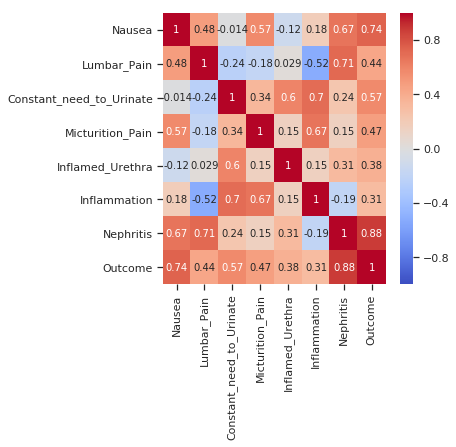

In [8]:
# Correlation Matrix
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),vmin=-1,cmap='coolwarm',annot=True);                               

In [9]:
# Clean up the Temperature column
data["Temperature"] = data["Temperature"].str.replace(",",".").astype(float)

X = np.array(data.iloc[:,:6])
y = np.array(data.iloc[:,8:9])

# Split the data

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [10]:

# Initialize Object
logisticRegr = LogisticRegression()

# Fitting parameters
logisticRegr.fit(xTrain, yTrain.ravel())

# Train & Test predictions
train_predictions = logisticRegr.predict(xTrain)
test_predictions = logisticRegr.predict(xTest)



/home/fabs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fabs/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [11]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def accuracy_check(true_y, pred_y):
    results = confusion_matrix(true_y, pred_y) 
    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(true_y, pred_y))
    print ('Report : ')
    print (classification_report(true_y, pred_y))

# Checking accuracy for Test data
accuracy_check(yTest, test_predictions)

Confusion Matrix :
[[ 7  0  0  0]
 [ 0 10  0  0]
 [ 0  0  4  2]
 [ 0  0  0  1]]
Accuracy Score : 0.9166666666666666
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        10
         2.0       1.00      0.67      0.80         6
         3.0       0.33      1.00      0.50         1

   micro avg       0.92      0.92      0.92        24
   macro avg       0.83      0.92      0.82        24
weighted avg       0.97      0.92      0.93        24



In [12]:
# Checking accuracy for Train data
accuracy_check(yTrain, train_predictions)

Confusion Matrix :
[[23  0  0  0]
 [ 0 30  0  0]
 [ 0  0 17  8]
 [ 0  0  0 18]]
Accuracy Score : 0.9166666666666666
Report : 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00        30
         2.0       1.00      0.68      0.81        25
         3.0       0.69      1.00      0.82        18

   micro avg       0.92      0.92      0.92        96
   macro avg       0.92      0.92      0.91        96
weighted avg       0.94      0.92      0.92        96

